![Imgur](https://i.imgur.com/h4PPC71.png)
#**19-modul. Unsupervised learning. Clustering**
# 19.8. Modul boʻyicha yakuniy amaliy vazifa. Mijozlarni xarajat turlariga qarab segmentlash

**Ushbu vazifa orqali siz:**

✔️ klasterlash;

✔️ maʼlumotlarni normallashtirish;

✔️ klaster tahlili;

✔️ vizualizatsiya kabi real data sayns loyihalari uchun zarur texnik ko‘nikmalarga ega bo‘lasiz.

## **Dataset: Wholesale Customers Data**  
- **Manba:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)  
- **Hajmi:** **22 KB**
- **Format:** CSV  
- **Tavsif:** bu dataset **ulgurji savdo mijozlarini** xarajatlar bo‘yicha klasterlash uchun ishlatiladi.  
  U quyidagi xarajat kategoriyalarini o‘z ichiga oladi:  
  - **channel** (mijoz turi: 1 – HoReCa (mehmonxona, restoran, kafelar) yoki 2 – chakana savdo)  
  - **region** (hudud: 1 – Lisbon, 2 – Oporto, 3 – boshqa)  
  - **fresh** (yangi mahsulotlarga sarf qilingan summa)  
  - **milk** (sut mahsulotlariga sarf qilingan summa)  
  - **grocery** (oziq-ovqat mahsulotlariga sarf qilingan summa)  
  - **frozen** (muzlatilgan mahsulotlarga sarf qilingan summa)  
  - **Detergents_Paper** (kimyoviy tozalash va qog‘oz mahsulotlari)  
  - **delicassen** (delikates mahsulotlar)  

---

### **Vazifa: mijozlarni xarajat turlariga qarab segmentlash**  
Maqsad – **mijozlarni xarajat qiladigan mahsulotlar bo‘yicha klasterlash va marketologlarga tavsiyalar berish**  

---

### **Klasterlash bosqichlari**  
1) **Maʼlumotlarni tayyorlash**  
   - `Channel` va `Region` ustunlarini olib tashlang yoki kodlang.  
   - Har bir xarajat ustunini **normalizatsiya qiling**.  

2) **K-means klasterlashni amalga oshirish**  
   - K-means yordamida mijozlarni **xarajat qilish odatlari** bo‘yicha segmentlarga ajrating.  

3) **Natijalarni vizualizatsiya qilish**  
   - **Pairplot yoki scatter plot** yordamida klasterlarni ko‘rsating.  
   - Har bir segmentning xarajatlar bo‘yicha o‘rtacha qiymatini diagrammada aks ettiring.

---

###*** ESLATMA**: *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Wholesale_customers_data.csv")
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
#javobni shu yerda yozing.


In [ ]:
df.shape

(440, 8)

In [ ]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop(['Channel', 'Region'], axis=1)

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(df)

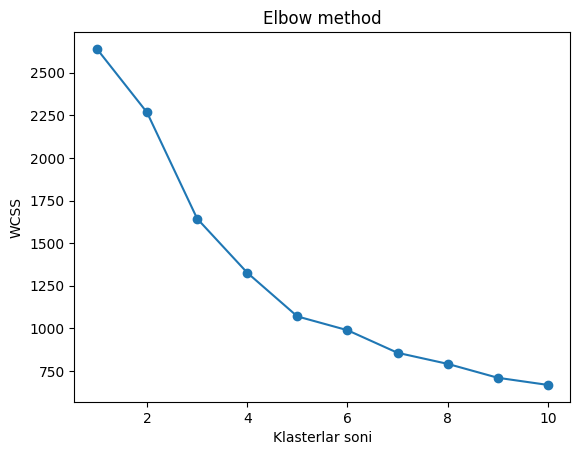

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Grafik ko'rish
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Klasterlar soni')
plt.ylabel('WCSS')
plt.title('Elbow method')
plt.show()

In [ ]:
k_means = KMeans(n_clusters=3, random_state=38)

In [ ]:
k_means.fit(x)

KMeans(n_clusters=3, random_state=38)

In [ ]:
k_means.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2,
       0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
df['klaster'] = k_means.labels_
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,klaster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,2


In [ ]:
df['klaster'].value_counts()

,count
klaster,
0,338
2,68
1,34


<Figure size 1000x600 with 0 Axes>

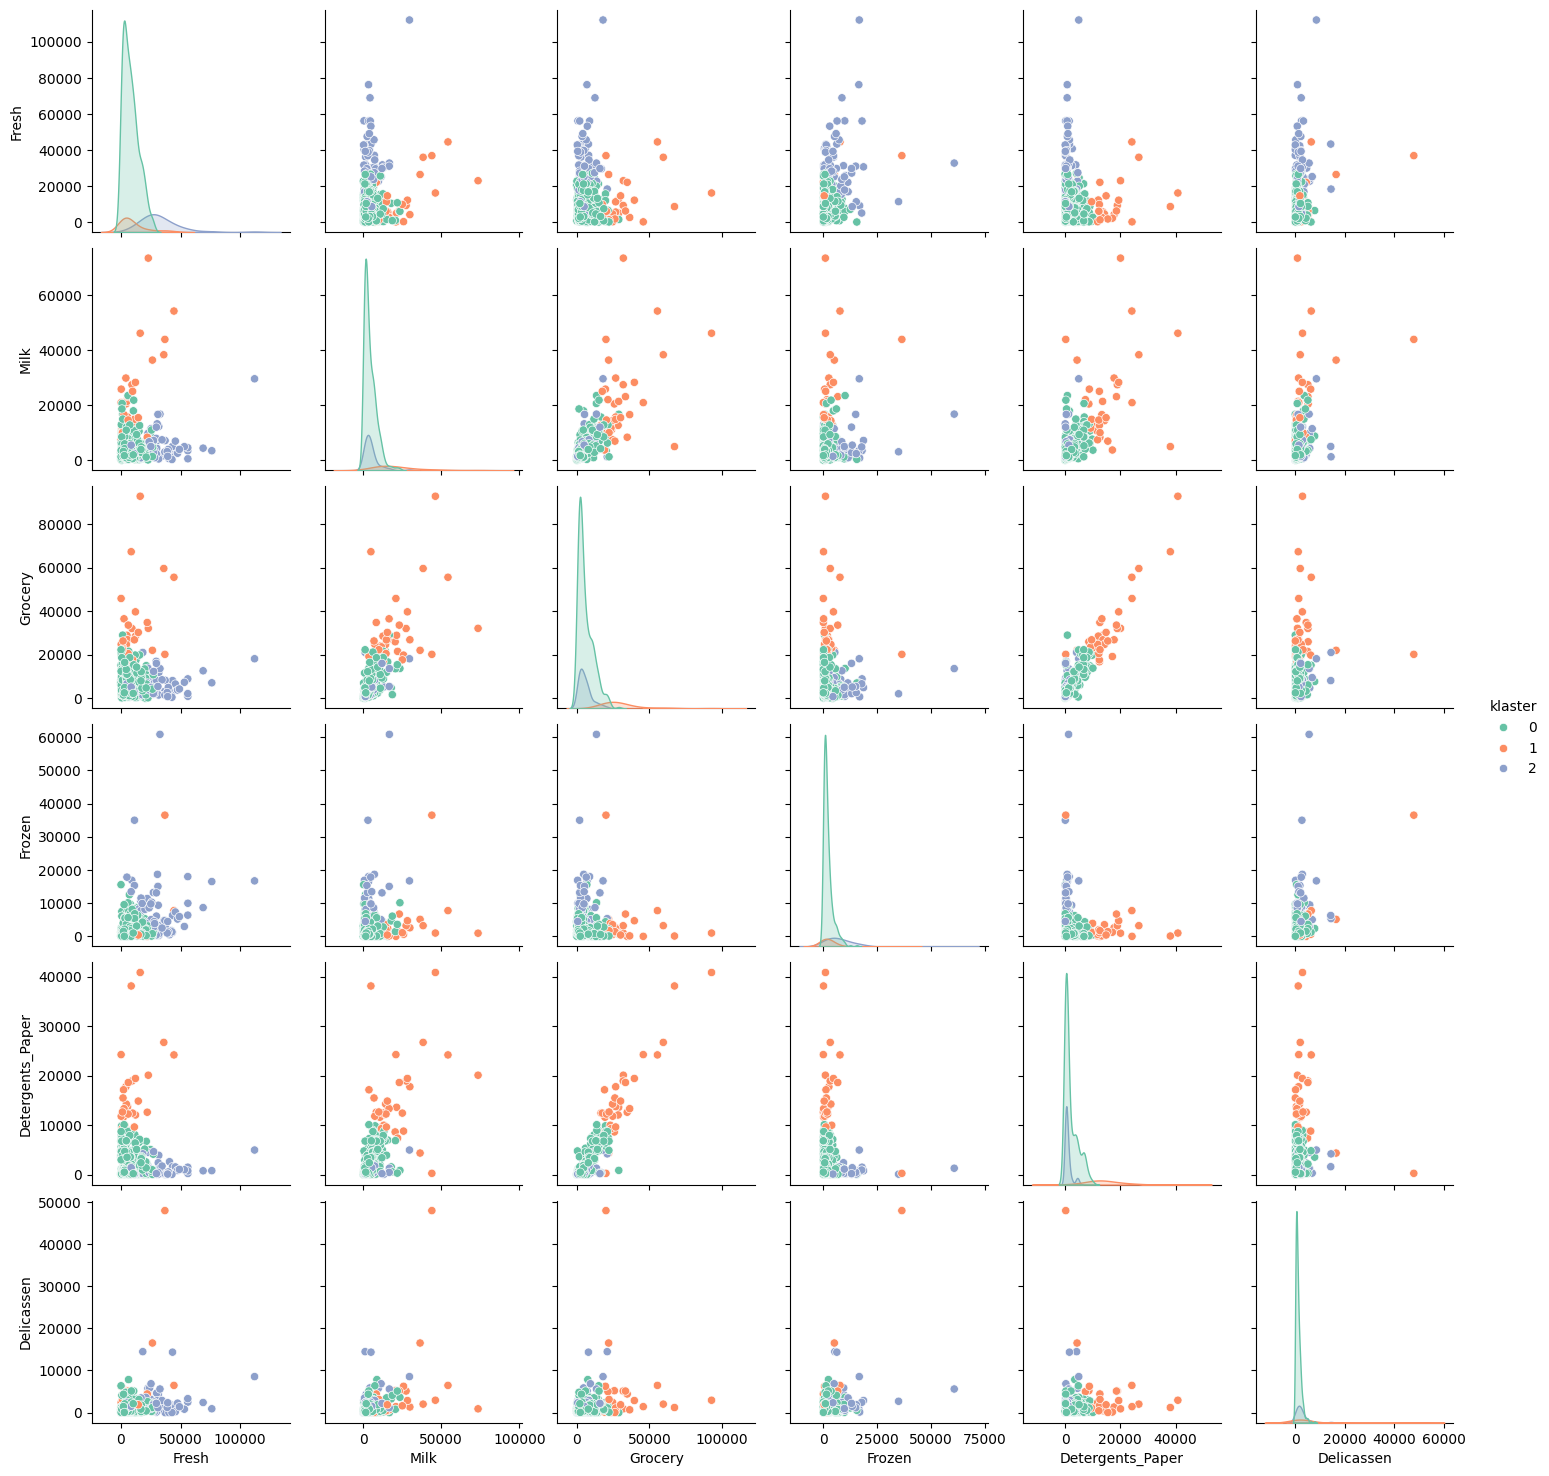

In [ ]:
plt.figure(figsize=(10,6))
sns.pairplot(df, hue='klaster', palette='Set2', diag_kind='kde')

In [ ]:
mean = df.groupby('klaster').mean()
mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
klaster,,,,,,
0,26266.928571,33847.785714,39952.285714,10703.428571,18539.142857,7718.071429
1,13419.204969,3202.779503,3906.118012,3285.701863,887.397516,1178.406832
2,5686.634615,10049.932692,16167.884615,1382.750000,6947.759615,1763.875000


<Axes: xlabel='klaster'>

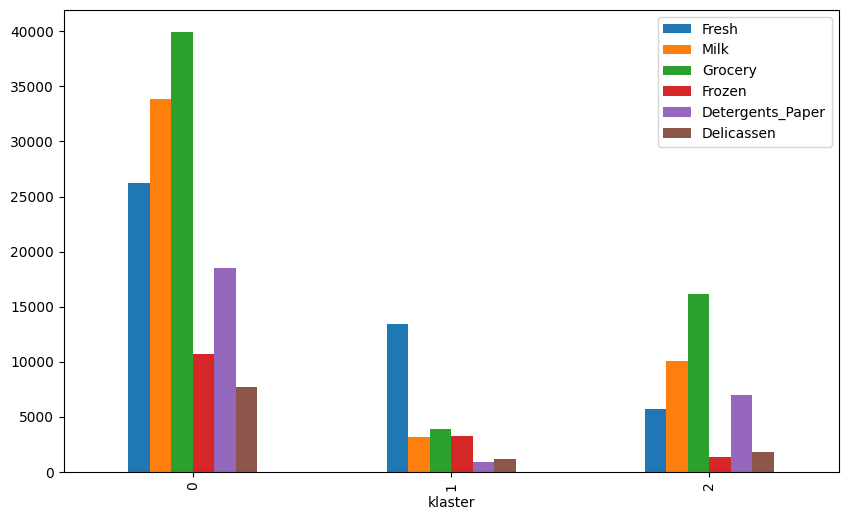

In [ ]:
mean.plot(kind='bar', figsize=(10,6))

# YAKUNIY TAHLIL VA XULOSALAR:

Klasterlarni 3 qismga bo'ldim: 0 , 1 va 2. Sababi ushbu dataset uchun klasterlar soni 3 ta bo'lgani eng maqul varyant bo'ldi. 0 klasterda 338 ta, 1 klasterda 34 ta va ikkinchi klasterda 68 ta element mavjud. Bulardan nimani bilib olishimiz mumkin: 0 klasterda barcha mahsulot harajatlarini eng yuqorilari joylashgan. Chunki o'rtacha qiymat qogan ikki klasterdagi xarajatlarning o'rtacha qiymatidan yaqqol yuqori.